In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('/Users/yangerjia/Desktop/inspection2023_Ver2.csv')
data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,pop_sqkm,num_crime_in2021,Hispanic or Latino,white,Black or African American,American Indian,Asian,Hawaiian,other,new_cuisine
0,50088158,XIANG HOTPOT,Brooklyn,5816,FORT HAMILTON PARKWAY,11219,7188515888,Chinese,2023-02-13,Violations were cited in the following area(s).,...,13647.151487,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Chinese
1,50131276,WHATSUP CAFE,Brooklyn,6609,FORT HAMILTON PARKWAY,11219,7187907666,Asian/Asian Fusion,2023-03-23,Violations were cited in the following area(s).,...,13647.151487,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Asian
2,50052708,PARC OASIS,Brooklyn,6403,11 AVENUE,11219,9292922010,Seafood,2023-02-23,Violations were cited in the following area(s).,...,13647.151487,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Meat
3,41028194,SAI'S CAFE,Brooklyn,6003,FORT HAMILTON PARKWAY,11219,6463611524,Bakery Products/Desserts,2023-02-28,Violations were cited in the following area(s).,...,13647.151487,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Bakery/Dessert
4,50049290,ORCHIDEA RESTAURANT,Brooklyn,4815,12 AVENUE,11219,7186867500,Jewish/Kosher,2023-02-06,Violations were cited in the following area(s).,...,13647.151487,1930,0.123917,0.605269,0.012608,0.001138,0.2347,0.0,0.016946,Jewish


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
features = ['num_foodDO','median income','prop_bachelor','pop_sqkm','num_crime_in2021','Hispanic or Latino','white', 'Black or African American', 'American Indian', 'Asian','Hawaiian', 'other', 'new_cuisine']
X = data.loc[:,features]
Y = data['GRADE']

X = pd.get_dummies(X, columns=['new_cuisine'])

print(X.shape)
print(Y.shape)

(9259, 70)
(9259,)


In [ ]:
#standardize
from sklearn.preprocessing import StandardScaler

cont_features = X.loc[:,'num_foodDO':'other']
dummies = X.loc[:,'new_cuisine_Afghan':]
cols = cont_features.columns

scaler = StandardScaler()
stand = scaler.fit_transform(cont_features)
stand_features = pd.DataFrame(stand, columns=cols)

X_standard = pd.concat([stand_features,dummies], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, stratify=y, test_size=0.2,random_state=234)
X_train_1, X_vali, Y_train_1, Y_vali = train_test_split(X_train, y_train, test_size=0.2, random_state=234)

In [ ]:
# Train the SVM model
clf = SVC()
clf.fit(X_train, y_train)

# Predict on the test data and compute accuracy and classification report
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

/Users/yangerjia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yangerjia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yangerjia/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
! pip install imblearn

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import matplotlib.pyplot as plt

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data only
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Fit the model on the oversampled data
clf = svm.SVC(kernel='poly')
clf.fit(X_train_res, y_train_res)

# Predict on the test data
y_pred = clf.predict(X_test)

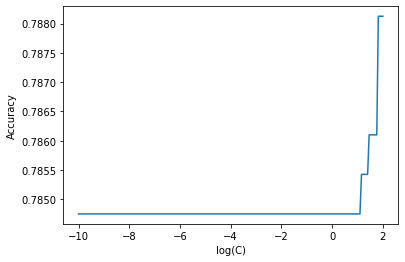

Maximum log(C) for Degree 1: 1.8190954773869343


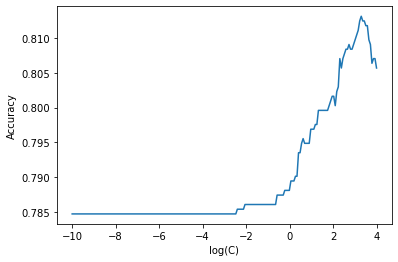

Maximum log(C) for Degree 2: 3.2964824120603016


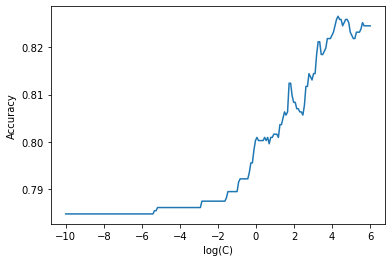

Maximum log(C) for Degree 3: 4.311557788944723


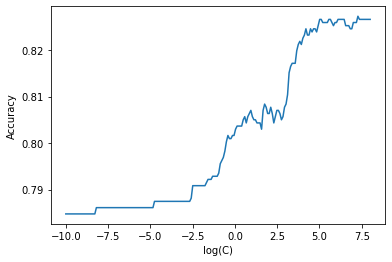

Maximum log(C) for Degree 4: 7.276381909547741


In [ ]:
import math
for d in range(1, 5):
    C = [math.exp(i) for i in np.linspace(-10, 2*d, 200)]
    log = [np.log(c) for c in C]
    OS = []
    for j in C:
        clf = svm.SVC(kernel='poly', degree=d, C=j)
        clf.fit(X_train_1, Y_train_1)
        
        correct= 1.0*(clf.predict(X_vali) == np.asarray(Y_vali)).sum() / len(Y_vali)
        OS.append(correct)
    
    temp = pd.DataFrame([log,OS]).T
    plt.plot(log, OS, label=f'Degree {d}')
    plt.ylabel('Accuracy')
    plt.xlabel('log(C)')
    plt.show()
    max_os = max(OS)
    max_log = log[OS.index(max_os)]
    print(f'Maximum log(C) for Degree {d}: {max_log}')

In [ ]:
max_accuracy = 0
for d in range(1, 5):
    C = [math.exp(i) for i in np.linspace(-10, 2*d, 200)]
    log = [np.log(c) for c in C]
    OS = []
    for j in C:
        clf = svm.SVC(kernel='poly', degree=d, C=j)
        clf.fit(X_train, y_train)
        correct= 1.0*(clf.predict(X_vali) == np.asarray(Y_vali)).sum() / len(Y_vali)
        OS.append(correct)
        if correct > max_accuracy:
            max_accuracy = correct
            optimal_degree = d
            optimal_C = j

print(f'Optimal degree: {optimal_degree}')
print(f'Optimal C: {optimal_C}')

Optimal degree: 3
Optimal C: 292.4787340127732


In [ ]:
svm_model=svm.SVC(kernel='poly',C=292.4787340127732,degree=3)
svm_model.fit(X_train, y_train)

# Evaluate the performance of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.683585313174946
              precision    recall  f1-score   support

           A       0.91      0.70      0.79      1446
           B       0.35      0.57      0.44       260
           C       0.34      0.75      0.47       146

    accuracy                           0.68      1852
   macro avg       0.53      0.67      0.57      1852
weighted avg       0.78      0.68      0.71      1852



After we conduct oversampling with SMOTE, The accuracy of the SVM model on the testing set is 0.684, which means that the model predicted the correct grade for about 68.4% of the restaurants in the testing set. The precision, recall, and F1-score for each grade are also shown in the output. 
For grade A, the precision is 0.91, which means that when the model predicts grade A, it is correct 91% of the time. The recall is 0.70, which means that the model correctly identified 70% of the restaurants that actually received grade A. The F1-score is 0.79, which is a harmonic mean of precision and recall. 
For grade B, the precision is 0.35, which means that when the model predicts grade B, it is correct 35% of the time. The recall is 0.57, which means that the model  correctly identified 57% of the restaurants that actually received grade B. The F1-score is 0.44. 
For grade C, the precision is 0.34, which means that when the model predicts grade C, it is correct 34% of the time. The recall is 0.75, which means that the model correctly identified 91% of the restaurants that actually received grade C. The F1-score is 0.47. 
Overall, the accuracy of the model decrease for a little, but the recall score for B and C increased.

In [ ]:
from sklearn.inspection import permutation_importance

# Get the feature importances using permutation feature importance
result = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean

# Create a dictionary to store the feature importances with their corresponding feature names
feature_importances = dict(zip(X.columns, importances))

# Sort the dictionary by the absolute value of the feature importances in descending order
sorted_importances = sorted(feature_importances.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the top 10 most important features
print("Top 10 most important features:")
for feature, importance in sorted_importances[:10]:
    print(f"{feature}: {importance}")

Top 10 most important features:
prop_bachelor: 0.12478401727861774
median income: 0.11582073434125276
num_crime_in2021: 0.09238660907127434
white: 0.09109071274298061
num_foodDO: 0.08034557235421172
Hispanic or Latino: 0.07710583153347736
Black or African American: 0.0690604751619871
American Indian: 0.0657127429805616
Asian: 0.05961123110151193
other: 0.04627429805615555


The SVM model identified the top 10 most important features for predicting restaurant grades, It seems that the most important features for predicting the grade are related to proportion of population with a bachelor's degree, followed by income levels and number of crimes in 2021, and the number of food scrap drop off location in each zip code, then we have some race factors.

In [ ]:
# Polynomial kernel. (Default C=1, Poly=3)
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(y_test)).sum()/len(y_test)
print("In sample, we successfully predict {} percent of the data".format((y_train==clf.predict(X_train)).sum()*100/len(y_train)))
print("Out of sample, the polynomial kernel successfully predicts {} percent of the data".format((correct)*100))

In sample, we successfully predict 79.89739435668962 percent of the data
Out of sample, the polynomial kernel successfully predicts 79.64362850971922 percent of the data


In [ ]:
# Polynomial kernel. (Default C=2980.9579870417283, Poly=2272.5167939024323)
clf = svm.SVC(kernel='poly',C=292.4787340127732,degree=3)
clf.fit(X_train, y_train)
correct=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
print("In sample, we successfully predict {} percent of the data".format((y_train==clf.predict(X_train)).sum()*100/len(y_train)))
print("Out of sample, the polynomial kernel successfully predicts {} percent of the data".format((correct)*100))

In sample, we successfully predict 86.53975968678277 percent of the data
Out of sample, the polynomial kernel successfully predicts 86.03238866396761 percent of the data
